#Task2

In [ ]:
#first install the umap than the package will install desired libaries
#!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82808 sha256=ad0142871a3be05a70b44ffe0a190d281640ac235d72daf4d0849bb544cfd603
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55617 sha256=2dab9a5d734312e5756cd54ab1154f8dbc02d3f9c84d385c99835590e51b1870
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
import pandas as pd
import numpy as np
import umap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Loading the dataset from the URL
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"
df = pd.read_csv(data_url)

In [ ]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.shape

(12330, 18)

In [ ]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [ ]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
df['Revenue']

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Name: Revenue, Length: 12330, dtype: bool

In [ ]:
# Select the relevant features
features = df[['Administrative', 'Informational', 'ProductRelated', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']]

In [ ]:

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Perform PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_features)

In [ ]:
# Perform UMAP
umap_model = umap.UMAP(n_components=3)
umap_result = umap_model.fit_transform(scaled_features)

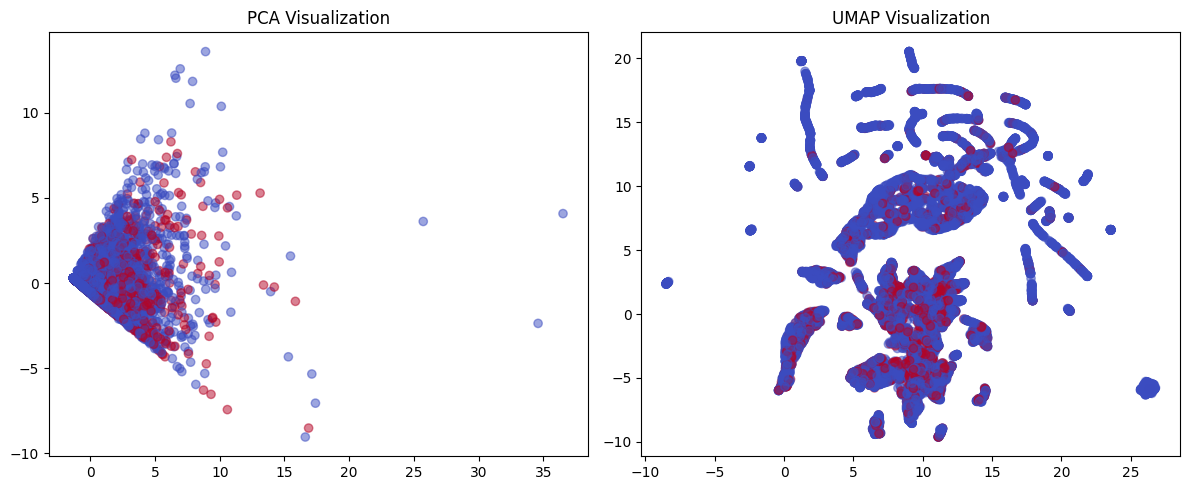

In [ ]:
# Create plots for PCA and UMAP
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Revenue'], cmap='coolwarm', alpha=0.5)
plt.title('PCA Visualization')

plt.subplot(1, 2, 2)
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=df['Revenue'], cmap='coolwarm', alpha=0.5)
plt.title('UMAP Visualization')

plt.tight_layout()
plt.show()

In [ ]:
# For PCA
best_pca_result = None
best_pca_variance = 0
for n_components in range(2, 7):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(scaled_features)
    if pca.explained_variance_ratio_.sum() > best_pca_variance:
        best_pca_result = pca_result
        best_pca_variance = pca.explained_variance_ratio_.sum()

In [ ]:
# Create a DataFrame for the interactive plot
df_pca = pd.DataFrame(data=best_pca_result, columns=[f'PCA Dimension {i+1}' for i in range(best_pca_result.shape[1])])

# Add a column for coloring the points by target
df_pca['Target'] = df['Revenue']

# Create an interactive scatter plot using Plotly
fig_pca = px.scatter(df_pca, x='PCA Dimension 1', y='PCA Dimension 2', color='Target', color_continuous_scale='coolwarm', opacity=0.5)
fig_pca.update_layout(title='Interactive PCA Visualization for Online Shoppers Dataset', xaxis_title='PCA Dimension 1', yaxis_title='PCA Dimension 2')

# Display the interactive plot
fig_pca.show()

In [ ]:
# Create a DataFrame for the interactive 3D plot
df_pca_3d = pd.DataFrame(data=best_pca_result, columns=[f'PCA Dimension {i+1}' for i in range(best_pca_result.shape[1])])

# Add a column for coloring the points by target
df_pca_3d['Target'] = df['Revenue']

# Create an interactive 3D scatter plot using Plotly
fig_pca_3d = px.scatter_3d(df_pca_3d, x='PCA Dimension 1', y='PCA Dimension 2', z='PCA Dimension 3', color='Target', color_continuous_scale='coolwarm', opacity=0.5)
fig_pca_3d.update_layout(title='Interactive 3D PCA Visualization for Online Shoppers Dataset')

# Display the interactive 3D plot
fig_pca_3d.show()

In [ ]:
# Perform UMAP with hyperparameter tuning
best_umap_result = None
best_umap_score = float('inf')
for n_neighbors in [5, 10, 15]:
    for min_dist in [0.1, 0.5, 0.9]:
        umap_model = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=min_dist)
        umap_result = umap_model.fit_transform(scaled_features)
        # No reconstruction_error() for UMAP
        # Use UMAP score (negative log-likelihood) for comparison
        umap_score = umap_model._a
        if umap_score < best_umap_score:
            best_umap_result = umap_result
            best_umap_score = umap_score

/usr/local/lib/python3.10/dist-packages/umap/spectral.py:260: UserWarning:

failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!

/usr/local/lib/python3.10/dist-packages/umap/spectral.py:260: UserWarning:

failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!

/usr/local/lib/python3.10/dist-packages/umap/spectral.py:260: UserWarning:

failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!

/usr/local/lib/python3.10/dist-packages/umap/spectral.py:260: UserWarning:

failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!

/usr/local/lib/python3.10/dist-packages/umap/spectral.py:260: UserWarning:

failed. This is likely due to too small 

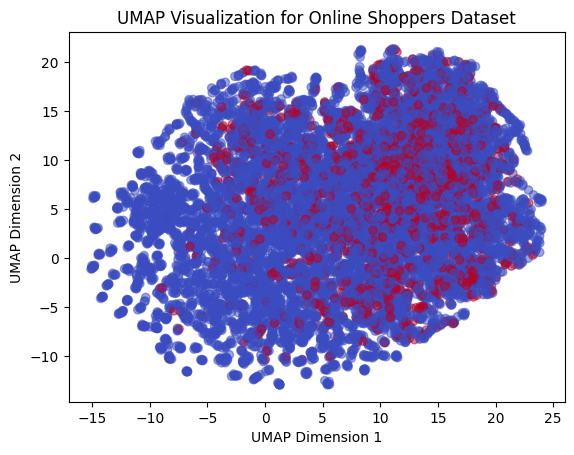

In [ ]:
# Visualize the UMAP results
plt.scatter(best_umap_result[:, 0], best_umap_result[:, 1], c=df['Revenue'], cmap='coolwarm', alpha=0.5)
plt.title('UMAP Visualization for Online Shoppers Dataset')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

In [ ]:
#for interactive plots
import plotly.express as px

In [ ]:
# Create an interactive Plotly scatter plot
data = pd.DataFrame(data=best_umap_result, columns=['UMAP Dimension 1', 'UMAP Dimension 2'])
data['Revenue'] = df['Revenue']

fig = px.scatter(data, x='UMAP Dimension 1', y='UMAP Dimension 2', color='Revenue', color_continuous_scale='coolwarm', opacity=0.5)
fig.update_layout(title='Interactive UMAP Visualization for Online Shoppers Dataset', xaxis_title='UMAP Dimension 1', yaxis_title='UMAP Dimension 2')

# Display the interactive plot
fig.show()

In [ ]:
# Perform UMAP with hyperparameter tuning
best_umap_result = None
best_umap_score = float('inf')
for n_neighbors in [5, 10, 15]:
    for min_dist in [0.1, 0.5, 0.9]:
        umap_model = umap.UMAP(n_components=3, n_neighbors=n_neighbors, min_dist=min_dist)
        umap_result = umap_model.fit_transform(scaled_features)
        # No reconstruction_error() for UMAP
        # Use UMAP score (negative log-likelihood) for comparison
        umap_score = umap_model._a
        if umap_score < best_umap_score:
            best_umap_result = umap_result
            best_umap_score = umap_score

In [ ]:
# Create a DataFrame for the interactive 3D plot
df_umap_3d = pd.DataFrame(data=umap_result, columns=['UMAP Dimension 1', 'UMAP Dimension 2', 'UMAP Dimension 3'])
df_umap_3d['Revenue'] = df['Revenue']

# Create an interactive 3D scatter plot using Plotly
fig_umap_3d = px.scatter_3d(df_umap_3d, x='UMAP Dimension 1', y='UMAP Dimension 2', z='UMAP Dimension 3', color='Revenue', color_continuous_scale='coolwarm', opacity=0.5)
fig_umap_3d.update_layout(title='Interactive 3D UMAP Visualization for Online Shoppers Dataset')

# Display the interactive 3D plot
fig_umap_3d.show()

#Task3

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt

In [ ]:
#before runing this step mount the drive if you are running through Colab

In [ ]:
data_movies = "/content/drive/MyDrive/Assianments/Triveni_CA2/IMDB Dataset.csv"


In [ ]:
df_movies = pd.read_csv(data_movies)

In [ ]:
df_movies.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [ ]:
df_movies.shape

(50000, 2)

In [ ]:
df_movies.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
# Create a TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_movies['review'])

In [ ]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

In [ ]:
# Perform UMAP
umap_model = umap.UMAP(n_components=2)
umap_result = umap_model.fit_transform(tfidf_matrix)

In [ ]:
# Adding sentiment labels to the results
pca_result = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
umap_result = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
results = pd.concat([pca_result, umap_result, df_movies['sentiment']], axis=1)

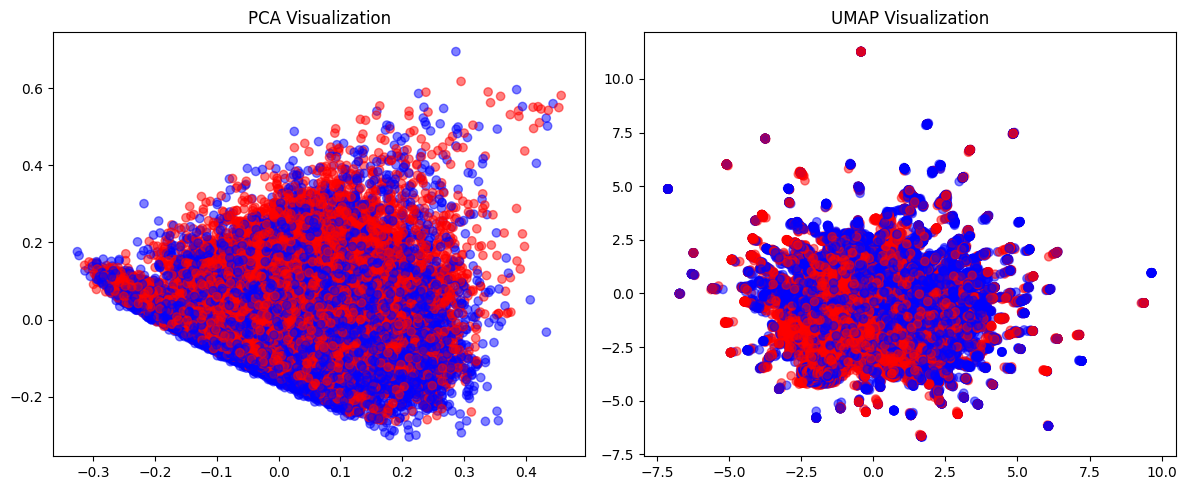

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(pca_result['PC1'], pca_result['PC2'], c=df_movies['sentiment'].map({'positive': 'blue', 'negative': 'red'}), alpha=0.5)
plt.title('PCA Visualization')

plt.subplot(1, 2, 2)
plt.scatter(umap_result['UMAP1'], umap_result['UMAP2'], c=df_movies['sentiment'].map({'positive': 'blue', 'negative': 'red'}), alpha=0.5)
plt.title('UMAP Visualization')

plt.tight_layout()
plt.show()


In [ ]:
# Perform UMAP for 3D visualization
umap_model_3d = umap.UMAP(n_components=3)
umap_result_3d = umap_model_3d.fit_transform(tfidf_matrix.toarray())

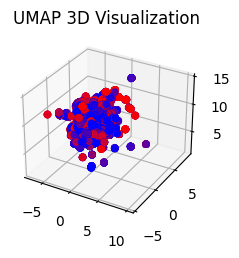

In [ ]:
# 3D UMAP Visualization
ax = plt.subplot(1, 3, 3, projection='3d')
ax.scatter(umap_result_3d[:, 0], umap_result_3d[:, 1], umap_result_3d[:, 2], c=df_movies['sentiment'].map({'positive': 'blue', 'negative': 'red'}), alpha=0.5)
ax.set_title('UMAP 3D Visualization')

plt.tight_layout()
plt.show()

In [ ]:
# Create interactive 3D UMAP plot using Plotly
fig = px.scatter_3d(df_movies, x=umap_result_3d[:, 0], y=umap_result_3d[:, 1], z=umap_result_3d[:, 2], color='sentiment', color_discrete_map={'positive': 'blue', 'negative': 'red'}, opacity=0.7)
fig.update_layout(title='Interactive 3D UMAP Visualization for Movie Reviews Sentiment', legend_title='Sentiment')

# Display the plot
fig.show()